In [41]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

WE ARE IMPORTING THE DEPENDENCIES

In [42]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

DATA CURATION

In [43]:
fashion_data = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data() 

In [44]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

IMAGE


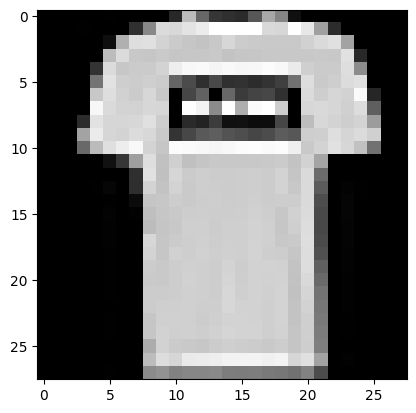

In [45]:
plt.imshow(train_images[1], cmap='gray')
plt.show()

In [46]:
train_labels[0]

9

RANGE FROM 0 - 255 SO WE NORMALIZE

In [47]:
train_images, test_images = train_images/255.0 , test_images/255.0

In [48]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

RESHAPE AND ADD CHANNEL INFO WHICH IS GRAYSCALE

In [50]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) #Number of images in the dataset, height, width, grayscale
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

10000

CNN

In [51]:
#BUILD THE CONVOLUTIONAL BASE
model = models.Sequential() # Creates an empty sequential model where layers can be added sequentially
# Conv2D: Adds a 2D convolutional layer with 32 filters of size 3x3
# activation='relu': Applies the ReLU activation function to introduce non-linearity
#INPUT SHAPE IS 28X28 WITH GRAYSCALE
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 

#MaxPooling2D: Adds a 2D max pooling layer with a 2x2 pooling window
#This reduces the size of the feature maps by half

model.add(layers.MaxPooling2D((2, 2))) 

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#ADD DENSE LAYERS ON TOP
model.add(layers.Flatten())

#Dense: Adds a fully connected layer with 64 neurons
# activation='relu': Applies the ReLU activation function
model.add(layers.Dense(64, activation='relu'))

#Dense: Adds the output layer with 10 neurons (one for each class)
# activation='softmax': Applies the softmax activation function to convert the output to a probability distribution over the 10 classes
model.add(layers.Dense(10, activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILING THE MODEL

In [53]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 1. The `optimizer='adam'` specifies the use of the Adam optimizer, which is known for its effectiveness and efficiency in training deep learning models.
#    Adam dynamically adjusts learning rates for each parameter and combines the advantages of AdaGrad and RMSProp optimizers.
#
# 2. The `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` sets the loss function to Sparse Categorical Crossentropy, suitable for classification tasks
#    with integer labels. The `from_logits=True` argument indicates that the model's output layer does not have a softmax activation applied,
#    and the loss function will handle the softmax computation internally. This is often done for numerical stability and efficiency.
#
# 3. The `metrics=['accuracy']` specifies that accuracy will be tracked as a metric during training and validation. Accuracy is a straightforward measure of how many
#    predictions the model gets correct, providing an intuitive understanding of the model's performance.

MODEL TRAINING

In [54]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5


c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7488 - loss: 0.6954 - val_accuracy: 0.8696 - val_loss: 0.3587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8778 - loss: 0.3353 - val_accuracy: 0.8866 - val_loss: 0.3157
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8958 - loss: 0.2820 - val_accuracy: 0.8921 - val_loss: 0.2934
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9080 - loss: 0.2472 - val_accuracy: 0.8953 - val_loss: 0.2830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9201 - loss: 0.2172 - val_accuracy: 0.8980 - val_loss: 0.2840


EVALUATING THE MODEL

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8980 - loss: 0.2840

Test accuracy: 0.8980000019073486


ACCURACY GRAPH

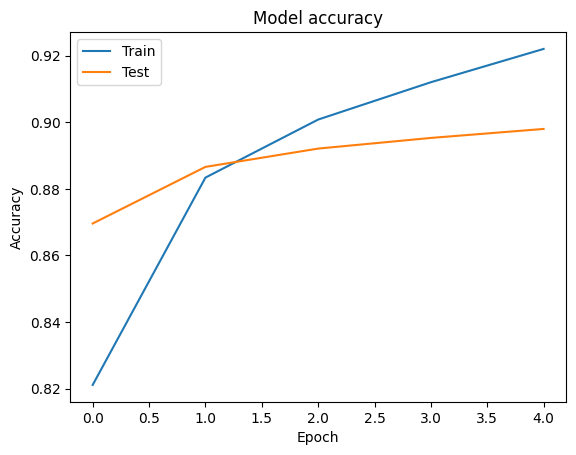

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

LOSS GRAPH

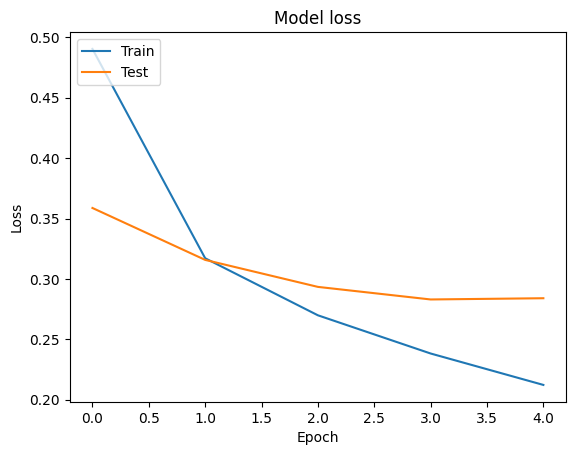

In [57]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

SAVING THE MODEL

In [58]:
model.save('trained_fashion_detection_model.h5')